# Storytelling with Open Data and Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import sys

In [2]:
print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 19:19:16) 
[GCC 7.2.0]


#### About this dataset: https://data.novascotia.ca/Procurement-and-Contracts/Awarded-Public-Tenders/m6ps-8j6u

In [3]:
df = pd.read_csv("https://data.novascotia.ca/api/views/m6ps-8j6u/rows.csv?accessType=DOWNLOAD")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14252 entries, 0 to 14251
Data columns (total 11 columns):
TENDER_ID             14252 non-null object
ENTITY                14252 non-null object
GOODS                 14252 non-null object
SERVICE               14252 non-null object
CONSTRUCTION          14252 non-null object
TENDER_START_DATE     14252 non-null object
TENDER_CLOSE_DATE     14252 non-null object
TENDER_DESCRIPTION    14249 non-null object
AWARDED_DATE          14250 non-null object
AWARDED_AMOUNT        14251 non-null object
VENDOR                14234 non-null object
dtypes: object(11)
memory usage: 1.2+ MB


In [5]:
df.AWARDED_DATE = pd.to_datetime(df.AWARDED_DATE)

In [6]:
df.index = df['AWARDED_DATE']

In [7]:
del df['AWARDED_DATE']

In [8]:
df['AWARDED_AMOUNT'] = (df['AWARDED_AMOUNT'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [9]:
df.head()

,TENDER_ID,ENTITY,GOODS,SERVICE,CONSTRUCTION,TENDER_START_DATE,TENDER_CLOSE_DATE,TENDER_DESCRIPTION,AWARDED_AMOUNT,VENDOR
AWARDED_DATE,,,,,,,,,,
2010-04-26,ITQ-03-03-2010,Annapolis Valley Regional School Board,Y,N,N,03/31/2010,04/22/2010,Sale of Surplus Trucks,1831.0,NaN
2010-05-11,60139535,Transportation and Infrastructure Renewal,N,N,Y,03/31/2010,04/15/2010,Tender for the Supply of Excavator with Operat...,67041.0,Blaine F. MacLane Excavation Ltd
2010-04-20,60139590,Transportation and Infrastructure Renewal,Y,N,N,04/02/2010,04/19/2010,"Tender for Western Hemlock Rough Sawn Lumber,T...",37183.6,Stella-Jones Inc.
2010-04-26,cbi10_318,Community Services,Y,N,N,04/02/2010,04/20/2010,"Supply only 20 Wall Ovens, 20 Cooktops and 20 ...",29154.0,"J.R. Rahey""s Ltd."
2010-04-30,2010-01,Annapolis Valley Regional School Board,N,N,Y,04/02/2010,04/28/2010,"Gaspereau Valley Elementary School, Interior R...",1705657.0,Avondale Construction


In [10]:
df.tail()

,TENDER_ID,ENTITY,GOODS,SERVICE,CONSTRUCTION,TENDER_START_DATE,TENDER_CLOSE_DATE,TENDER_DESCRIPTION,AWARDED_AMOUNT,VENDOR
AWARDED_DATE,,,,,,,,,,
2017-11-24,WRHA201797,Western Regional Housing Authority,N,Y,N,11/01/2017,11/15/2017,Carpet Cleaning For Lunenburg and Queens Counties,12631.6,Brezac Property Services
2017-11-24,WRHA201799,Western Regional Housing Authority,N,Y,N,11/01/2017,11/15/2017,Garbage Sorting in Various Locations in Lunenb...,22356.0,Brezac Property Services
2017-11-20,HRM-17M210,Halifax Regional Municipality (HRM),Y,N,N,11/02/2017,11/16/2017,Supply & Deliver 200 Reusable Vinyl Parking Me...,2610.0,Northern Specialty Supplies Inc.
2017-11-17,T82017,Municipality of the County of Victoria,N,N,Y,11/03/2017,11/14/2017,Re-use Building - the work shall comprise but ...,32340.0,Gears Construction
2017-11-23,CN-30-FY18,Nova Scotia Liquor Corporation,N,N,Y,11/03/2017,11/21/2017,Interior Fit-Up for NSLC Scotia Sq. Express Re...,382000.0,RCS Construction Inc.


In [11]:
df_2017 = df['2017']

In [12]:
df_2017 = df_2017.sort_values(by=['ENTITY'])

In [13]:
df_2017.head()

,TENDER_ID,ENTITY,GOODS,SERVICE,CONSTRUCTION,TENDER_START_DATE,TENDER_CLOSE_DATE,TENDER_DESCRIPTION,AWARDED_AMOUNT,VENDOR
AWARDED_DATE,,,,,,,,,,
2017-01-10,60150124,Agriculture,N,N,Y,11/30/2016,12/14/2016,"Supply, Delivery and Placement of Barrier Rock...",155169.50,DEXTER CONSTRUCTION CO. LTD.
2017-03-02,WS52420884,Agriculture,Y,N,N,02/02/2017,02/17/2017,Tissue Processor Purchase for Laboratory Servi...,64047.00,Somagen
2017-08-22,WS64561254,Agriculture,Y,Y,N,03/24/2017,04/24/2017,"The provision, delivery and installation of an...",48702.29,Getinge Canada Limited
2017-05-09,WS43206560,Agriculture,Y,N,N,11/17/2016,12/06/2016,Request for Proposals for the Provision and De...,8700.00,Unity Scientific
2017-01-10,60150132,Agriculture,N,N,Y,12/03/2016,12/20/2016,"Supply, Delivery and Placement of Barrier Rock...",46600.00,DEXTER CONSTRUCTION CO. LTD.


In [14]:
df_2017.tail()

,TENDER_ID,ENTITY,GOODS,SERVICE,CONSTRUCTION,TENDER_START_DATE,TENDER_CLOSE_DATE,TENDER_DESCRIPTION,AWARDED_AMOUNT,VENDOR
AWARDED_DATE,,,,,,,,,,
2017-08-15,wcb2017-005,Workers Compensation Board of N.S.,Y,N,N,06/22/2017,07/07/2017,WCBNS seeks proposals for an Uninterruptable P...,53088.45,Universal Power Solutions Inc
2017-09-29,wcb0217-018,Workers Compensation Board of N.S.,N,Y,N,08/10/2017,08/24/2017,WCBNS seeks proposals for qualified professio...,14400.00,Horace Paving
2017-02-01,wcb2016-018,Workers Compensation Board of N.S.,N,Y,N,11/16/2016,12/05/2016,The WCB is seeking an experienced market resea...,652939.00,MQO Research
2017-06-16,wcb2017-009,Workers Compensation Board of N.S.,N,Y,N,05/10/2017,05/23/2017,WCBNS seeks interest from physicians who may b...,250.00,multiple - see below
2017-06-30,wcb2017-015,Workers Compensation Board of N.S.,Y,N,N,06/14/2017,06/29/2017,WCBNS seeks general contracting services for o...,144803.00,MRS Construction Ltd.


In [15]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1770 entries, 2017-01-10 to 2017-06-30
Data columns (total 10 columns):
TENDER_ID             1770 non-null object
ENTITY                1770 non-null object
GOODS                 1770 non-null object
SERVICE               1770 non-null object
CONSTRUCTION          1770 non-null object
TENDER_START_DATE     1770 non-null object
TENDER_CLOSE_DATE     1770 non-null object
TENDER_DESCRIPTION    1769 non-null object
AWARDED_AMOUNT        1770 non-null float64
VENDOR                1768 non-null object
dtypes: float64(1), object(9)
memory usage: 152.1+ KB


In [16]:
plt.rcParams['figure.figsize']=(8,30)

In [17]:
plt.figure()

In [18]:
sns.set(font_scale=1.25)

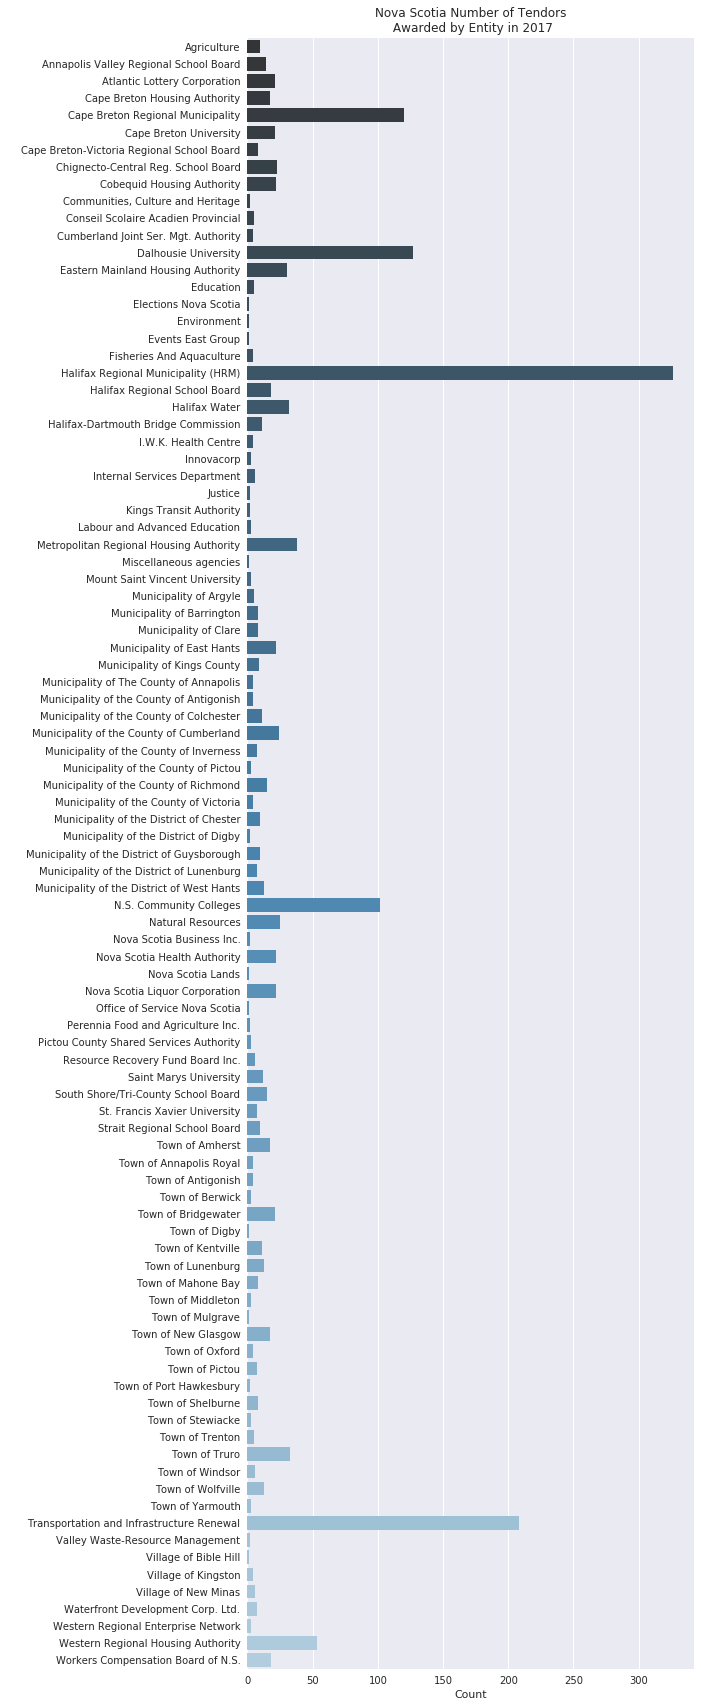

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(y="ENTITY", data=df_2017, palette="Blues_d")
ax.set_title('Nova Scotia Number of Tendors\n Awarded by Entity in 2017')
plt.ylabel(' ')
plt.xlabel('Count')
plt.show()